<a href="https://colab.research.google.com/github/rifkifakhrudin2004/PCVKSemester5/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama   : Rifki Fakhrudin
#Kelas  : 3C
#absen  : 23
#Materi : Thresholding, Segmentasi Sederhana

In [1]:
# Load Data
from google.colab import drive

#akses google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

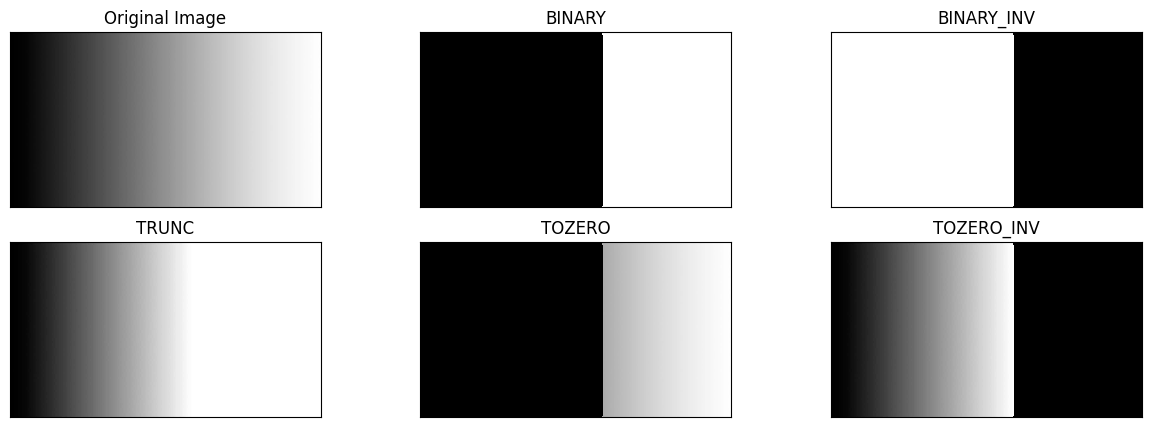

In [4]:
def global_thresholding(image_path, threshold_value):
    # Load the image
    img = cv.imread(image_path, 0)  # Load as grayscale image

    # 1. Binary threshold
    ret, thresh1 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY)

    # 2. Binary threshold inverse
    ret, thresh2 = cv.threshold(img, threshold_value, 255, cv.THRESH_BINARY_INV)

    # 3. Threshold Truncate
    ret, thresh3 = cv.threshold(img, threshold_value, 255, cv.THRESH_TRUNC)

    # 4. Threshold Tozero
    ret, thresh4 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO)

    # 5. Threshold Tozero Inverse
    ret, thresh5 = cv.threshold(img, threshold_value, 255, cv.THRESH_TOZERO_INV)

    # Define titles and images for display
    titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

    # Plot images
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], 'gray', interpolation='nearest')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

    plt.show()

# Example of how to call the method
image_path = '/content/drive/MyDrive/Images/gradient.jpg'
threshold_value = 170
global_thresholding(image_path, threshold_value)

<ipython-input-5-aadaa17d2fb7>:24: RuntimeWarning: invalid value encountered in divide
  between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))


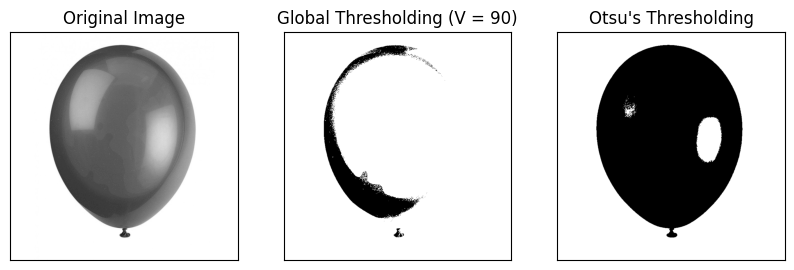

Optimal threshold calculated by Otsu's method: 185


In [5]:
# Function for applying global thresholding
def global_thresholding(img, thresh_value):
    _, global_thresh = cv.threshold(img, thresh_value, 255, cv.THRESH_BINARY)
    return global_thresh

# Load the image
filename = '/content/drive/MyDrive/Images/balloon.jpg'
img = cv.imread(filename, 0)  # Load as grayscale image

# Calculate histogram
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

# Normalize the histogram
hist = hist.astype(float) / hist.sum()

# Compute cumulative sum and cumulative mean
cumulative_sum = np.cumsum(hist)
cumulative_mean = np.cumsum(hist * np.arange(256))

# Global mean (mean of the entire image)
global_mean = cumulative_mean[-1]

# Compute the between-class variance for each threshold
between_class_variance = ((global_mean * cumulative_sum - cumulative_mean) ** 2) / (cumulative_sum * (1 - cumulative_sum))

# Handle division by zero (replace invalid values with zero)
between_class_variance = np.nan_to_num(between_class_variance)

# Find the threshold that maximizes the between-class variance
optimal_threshold = np.argmax(between_class_variance)

# Apply global thresholding (using a manually chosen threshold value for demonstration)
global_thresh_value = 90
global_result = global_thresholding(img, global_thresh_value)

# Apply Otsu's thresholding using the optimal threshold
_, otsu_result = cv.threshold(img, optimal_threshold, 255, cv.THRESH_BINARY)

# Display the original image, global thresholding, and Otsu's thresholding
titles = ['Original Image', 'Global Thresholding (V = 90)', "Otsu's Thresholding"]
images = [img, global_result, otsu_result]

plt.figure(figsize=(10, 5))
for i in range(3):  # Loop for 3 images
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Display the optimal threshold value calculated by Otsu's method
print(f"Optimal threshold calculated by Otsu's method: {optimal_threshold}")

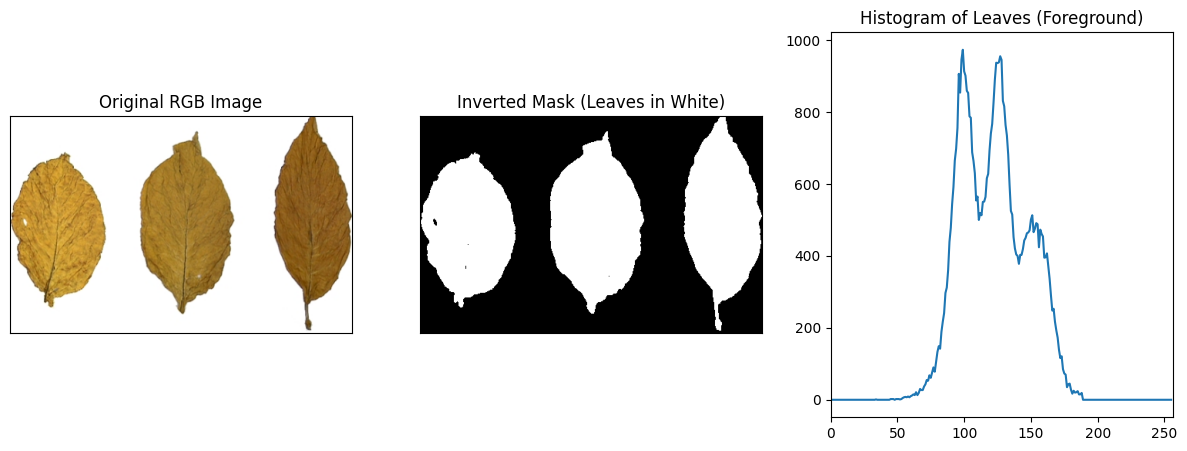

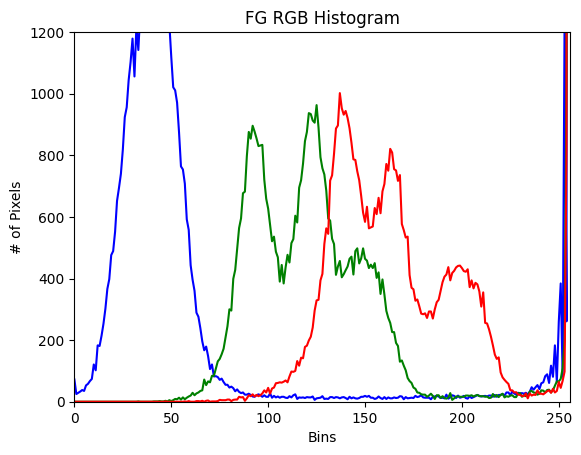

-1

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in color (BGR format)
filename = '/content/drive/MyDrive/Images/tobacco.jpg'
img_color = cv.imread(filename)  # Load the image in color (BGR)

# Convert the image from BGR to RGB for displaying in matplotlib
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

# Load the image in grayscale
img_gray = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Load as grayscale image

# Step 1: Use Otsu's method to create a binary mask where leaves (foreground) are white
ret, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Invert the mask so that leaves are white and the background is black
mask_inv = cv.bitwise_not(mask)

# Step 2: Calculate the histogram for the segmented (foreground) image using the inverted mask
hist_foreground = cv.calcHist([img_gray], [0], mask_inv, [256], [0, 256])

# Step 3: Plot the original RGB image, mask, and histogram
plt.figure(figsize=(15, 5))

# Plot the original RGB image
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)  # Display the RGB image
plt.title('Original RGB Image')
plt.xticks([]), plt.yticks([])

# Plot the inverted mask (foreground is white)
plt.subplot(1, 3, 2)
plt.imshow(mask_inv, cmap='gray')  # Display the mask
plt.title('Inverted Mask (Leaves in White)')
plt.xticks([]), plt.yticks([])

# Plot the histogram of the foreground (leaves)
plt.subplot(1, 3, 3)
plt.plot(hist_foreground)
plt.title('Histogram of Leaves (Foreground)')
plt.xlim([0, 256])

plt.show()

# Second part: Plot flattened color histogram of another image
chans = cv.split(img_color)
colors = ('b', 'g', 'r')

plt.figure()
plt.title('FG RGB Histogram')
plt.xlabel('Bins')
plt.ylabel('# of Pixels')

# Plot histograms for each color channel
for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.ylim([0, 1200])  # Adjusting y-limit based on your requirement

plt.show()
cv.waitKey(0)

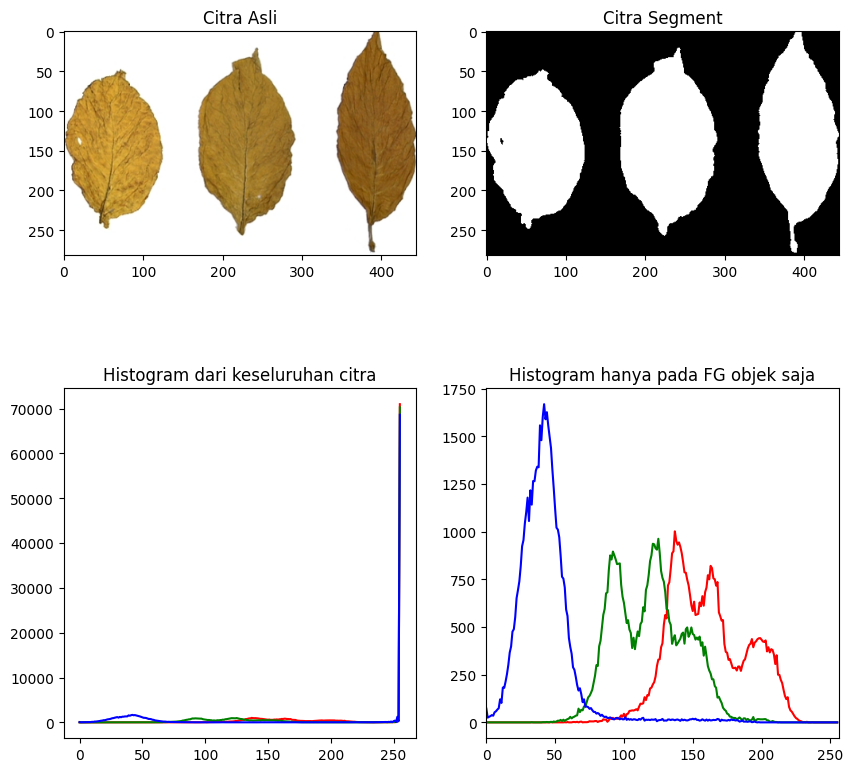

In [8]:
filename = ('/content/drive/MyDrive/Images/tobacco.jpg')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)


plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

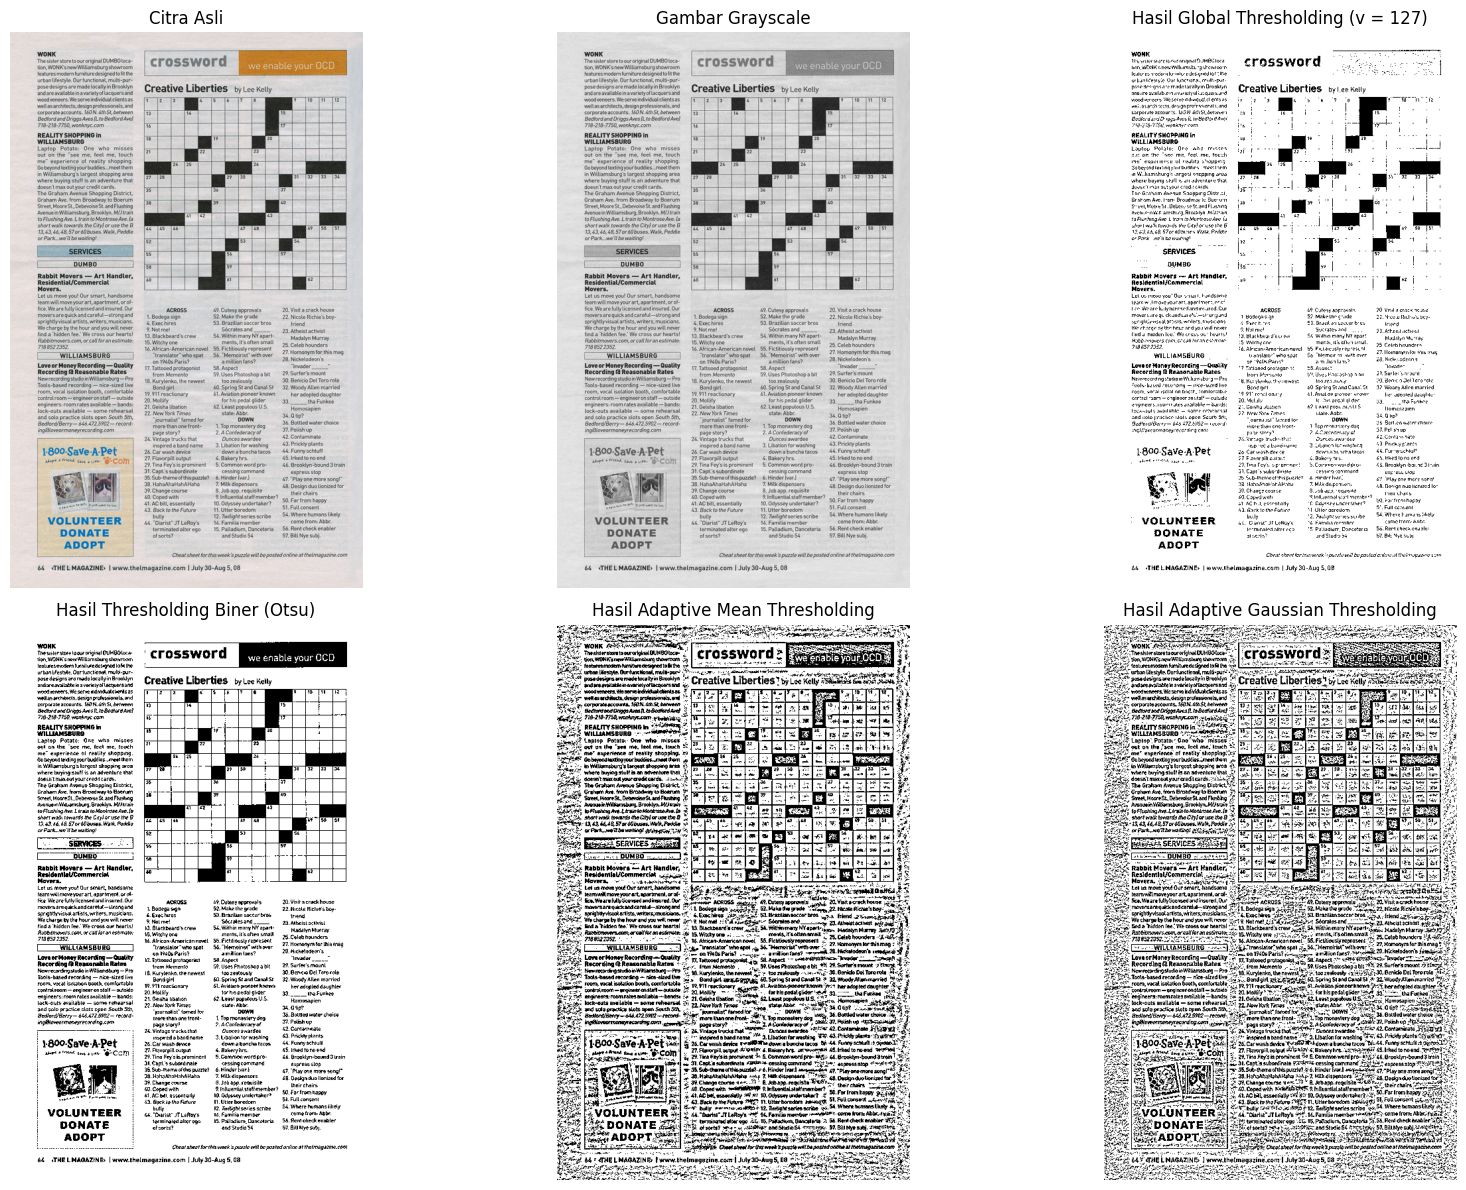

In [9]:
image_path = '/content/drive/MyDrive/Images/crossword.jpg'

# Membaca gambar
img = cv.imread(image_path)
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 1. Global Thresholding
ret_global, binary_threshold_global = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)

# 2. Otsu's Thresholding
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# 3. Adaptive Mean Thresholding
adaptive_mean = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# 4. Adaptive Gaussian Thresholding
adaptive_gaussian = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

# Menampilkan hasil untuk masing-masing metode
plt.figure(figsize=(18, 12))  # Memperbesar ukuran gambar

# Menampilkan gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Plot Gambar Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Plot Hasil Global Thresholding
plt.subplot(2, 3, 3)
plt.imshow(binary_threshold_global, cmap='gray')
plt.title('Hasil Global Thresholding (v = 127)')
plt.axis('off')

# Plot Hasil Otsu's Thresholding
plt.subplot(2, 3, 4)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('off')

# Plot Hasil Adaptive Mean Thresholding
plt.subplot(2, 3, 5)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Hasil Adaptive Mean Thresholding')
plt.axis('off')

# Plot Hasil Adaptive Gaussian Thresholding
plt.subplot(2, 3, 6)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Hasil Adaptive Gaussian Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()

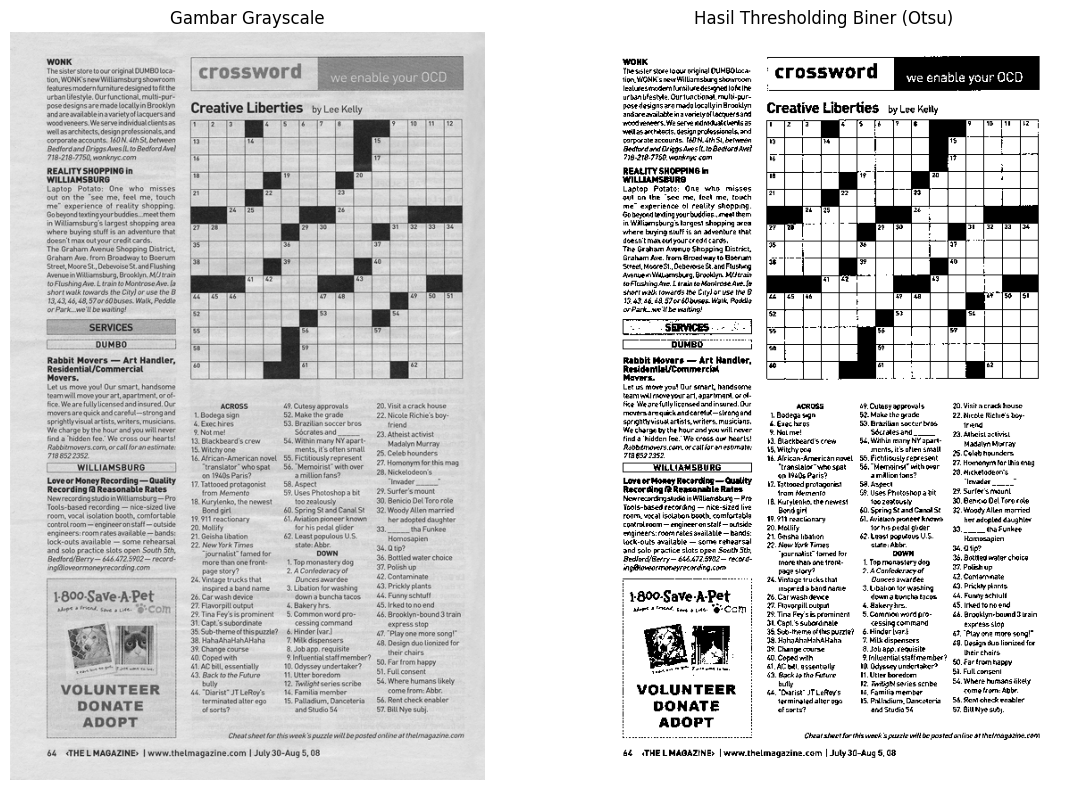

In [10]:
# Menggunakan gambar yang sudah ada sebelumnya
image = cv.imread('/content/drive/MyDrive/Images/crossword.jpg')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menggunakan Otsu's thresholding
ret_otsu, binary_threshold_otsu = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(12, 8))  # Memperbesar ukuran gambar

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Menampilkan hasil segmentasi Otsu's thresholding
plt.subplot(1, 2, 2)
plt.imshow(binary_threshold_otsu, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu)')
plt.axis('off')

plt.tight_layout()  # Menjaga layout agar lebih rapi
plt.show()